In [108]:
import pandas as pd 
df = pd.read_csv('./archive/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [109]:
X = df.drop('Outcome', axis=1).values
y = df['Outcome']


In [110]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)



In [106]:
import torch 
import torch.nn as nn
import torch.nn.functional as F 


In [107]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)



ValueError: could not determine the shape of object type 'Series'

In [81]:
class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, out_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1)
        self.f_connected2 = nn.Linear(hidden1, hidden2)
        self.out = nn.Linear(hidden2, out_features)
    def forward(self,x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x


In [82]:
torch.manual_seed(20)
model=ANN_Model()


In [83]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [84]:
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)


In [85]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train)
    loss=loss_function(y_pred,y_train)
    final_losses.append(loss)
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.45721173286438
Epoch number: 11 and the loss : 0.8019211292266846
Epoch number: 21 and the loss : 0.6090322732925415
Epoch number: 31 and the loss : 0.591776967048645
Epoch number: 41 and the loss : 0.5679707527160645
Epoch number: 51 and the loss : 0.552903950214386
Epoch number: 61 and the loss : 0.5410097241401672
Epoch number: 71 and the loss : 0.5310392379760742
Epoch number: 81 and the loss : 0.522036075592041
Epoch number: 91 and the loss : 0.5135969519615173
Epoch number: 101 and the loss : 0.5061255097389221
Epoch number: 111 and the loss : 0.4983412027359009
Epoch number: 121 and the loss : 0.49605461955070496
Epoch number: 131 and the loss : 0.48286378383636475
Epoch number: 141 and the loss : 0.47560372948646545
Epoch number: 151 and the loss : 0.4799236059188843
Epoch number: 161 and the loss : 0.4792936146259308
Epoch number: 171 and the loss : 0.46499985456466675
Epoch number: 181 and the loss : 0.4582027494907379
Epoch number: 191 and th

In [86]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline


Text(0.5, 0, 'Epoch')

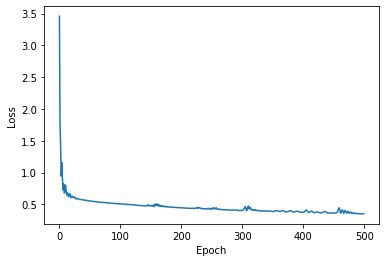

In [87]:
plt.plot(range(epochs),final_losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [88]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
0
0
1
1
0
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
1
0
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
0
0
1
0
0
0
0
0
1
0
0
0
0
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
0
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
1
0
0
1
0
0
1
0
0
0
0
0
0
0
1
0
0
0
0


In [92]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,predictions)
cm

ValueError: Found input variables with inconsistent numbers of samples: [614, 154]